In [29]:
%matplotlib inline
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
# data load
train = pd.read_csv("train.csv")
print(train.shape)
train.head()
test = pd.read_csv("test.csv")
print(test.shape)
test.head()




KeyboardInterrupt: 

In [51]:
y_train = train["label"].values
x_train = train.drop("label",axis=1)
x_train = x_train.values
xx_train = x_train[0:40000]
xx_test = x_train[40000:]
yy_train = y_train[0:40000]
yy_test = y_train[40000:]

In [55]:
xx_train.shape
xx_train = xx_train.reshape(40000,28,28)

xx_test = xx_test.reshape(2000,28,28)


[2 3 9 7 8 3 4 1 0 9]


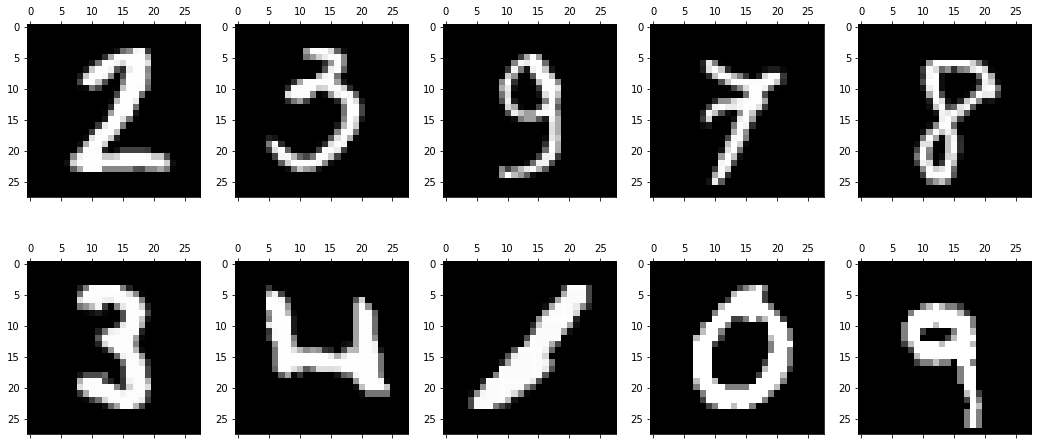

In [58]:

plt.gray()

print(yy_test[0:10])

figures, axes = plt.subplots(nrows=2, ncols=5)
figures.set_size_inches(18, 8)

axes[0][0].matshow(xx_test[0])
axes[0][1].matshow(xx_test[1])
axes[0][2].matshow(xx_test[2])
axes[0][3].matshow(xx_test[3])
axes[0][4].matshow(xx_test[4])
axes[1][0].matshow(xx_test[5])
axes[1][1].matshow(xx_test[6])
axes[1][2].matshow(xx_test[7])
axes[1][3].matshow(xx_test[8])
axes[1][4].matshow(xx_test[9])

In [59]:
xx_train = xx_train.reshape(40000,28*28)

xx_test = xx_test.reshape(2000,28*28)


In [60]:
print('x_train, test = ',xx_train.shape,xx_test.shape)
print('y_train, test = ',yy_train.shape,yy_test.shape)

x_train, test =  (40000, 784) (2000, 784)
y_train, test =  (40000,) (2000,)


In [61]:
from keras.utils import to_categorical
y_train_hot  = to_categorical(yy_train)
y_test_hot = to_categorical(yy_test)
print(y_train_hot.shape,y_test_hot.shape)

(40000, 10) (2000, 10)


In [64]:
yy_train[0:10]
y_test_hot[0:10]

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [66]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.initializers import RandomUniform
from keras.optimizers import SGD

model = Sequential()
model.add(Dense(units=10,
                kernel_initializer=RandomUniform(minval=0.0, maxval=0.001),
                input_shape=(28 * 28,)))
model.add(Activation('sigmoid'))

optimizers = SGD(lr=0.00001)
model.compile(optimizer=optimizers,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(xx_train,
          y_train_hot,
          epochs=20,
          validation_data=(xx_test, y_test_hot))

Train on 40000 samples, validate on 2000 samples
Epoch 1/20
40000/40000 [==============================] - 6s 151us/step - loss: 2.3024 - acc: 0.1870 - val_loss: 2.3021 - val_acc: 0.1910
Epoch 2/20
40000/40000 [==============================] - 6s 138us/step - loss: 2.2948 - acc: 0.1773 - val_loss: 2.2695 - val_acc: 0.1570
Epoch 3/20
40000/40000 [==============================] - 6s 140us/step - loss: 1.9815 - acc: 0.1329 - val_loss: 1.3943 - val_acc: 0.1120
Epoch 4/20
40000/40000 [==============================] - 6s 142us/step - loss: 1.0611 - acc: 0.1118 - val_loss: 1.0428 - val_acc: 0.1135
Epoch 5/20
40000/40000 [==============================] - 6s 144us/step - loss: 1.0063 - acc: 0.1133 - val_loss: 1.0281 - val_acc: 0.1140
Epoch 6/20
40000/40000 [==============================] - 6s 139us/step - loss: 0.9909 - acc: 0.1156 - val_loss: 1.0161 - val_acc: 0.1190
Epoch 7/20
40000/40000 [==============================] - 6s 138us/step - loss: 0.9820 - acc: 0.1190 - val_loss: 1.0136 - v

## new

In [69]:
xx_train = xx_train.reshape(40000, 28, 28, 1)
xx_test = xx_test.reshape(2000, 28, 28, 1)

print(xx_train.shape, xx_test.shape)

(40000, 28, 28, 1) (2000, 28, 28, 1)


In [74]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()

model.add(Conv2D(filters=6,
                 kernel_initializer='random_uniform',
                 activation='sigmoid',
                 kernel_size=(5, 5),
                 input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2),
                       strides=(2, 2)))

model.add(Conv2D(filters=12,
                 kernel_initializer='random_uniform',
                 activation='sigmoid',
                 kernel_size=(5, 5)))
model.add(MaxPooling2D(pool_size=(2, 2),
                       strides=(2, 2)))

model.add(Flatten())

model.add(Dense(units=128,
                kernel_initializer='random_uniform',
                activation='sigmoid'))
model.add(Dense(units=10,
                kernel_initializer='random_uniform',
                activation='sigmoid'))

from keras.optimizers import SGD

optimizer = SGD(lr=0.1)

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [75]:
model.fit(xx_train,
          y_train_hot,
          epochs=100,
#           epochs=30,
          validation_data=(xx_test, y_test_hot))

Train on 40000 samples, validate on 2000 samples
Epoch 1/100
40000/40000 [==============================] - 48s 1ms/step - loss: 2.3040 - acc: 0.1067 - val_loss: 2.3000 - val_acc: 0.1125
Epoch 2/100
40000/40000 [==============================] - 47s 1ms/step - loss: 2.3011 - acc: 0.1116 - val_loss: 2.2984 - val_acc: 0.1125
Epoch 3/100
40000/40000 [==============================] - 49s 1ms/step - loss: 2.2949 - acc: 0.1195 - val_loss: 2.2635 - val_acc: 0.2525
Epoch 4/100
40000/40000 [==============================] - 48s 1ms/step - loss: 1.0066 - acc: 0.7124 - val_loss: 0.4320 - val_acc: 0.8850
Epoch 5/100
40000/40000 [==============================] - 48s 1ms/step - loss: 0.2883 - acc: 0.9173 - val_loss: 0.2550 - val_acc: 0.9235
Epoch 6/100
40000/40000 [==============================] - 47s 1ms/step - loss: 0.2050 - acc: 0.9387 - val_loss: 0.1987 - val_acc: 0.9390
Epoch 7/100
40000/40000 [==============================] - 48s 1ms/step - loss: 0.1636 - acc: 0.9511 - val_loss: 0.1708 - v

40000/40000 [==============================] - 45s 1ms/step - loss: 0.0314 - acc: 0.9903 - val_loss: 0.0465 - val_acc: 0.9830
Epoch 60/100
40000/40000 [==============================] - 44s 1ms/step - loss: 0.0306 - acc: 0.9904 - val_loss: 0.0462 - val_acc: 0.9840
Epoch 61/100
40000/40000 [==============================] - 52s 1ms/step - loss: 0.0318 - acc: 0.9903 - val_loss: 0.0475 - val_acc: 0.9835
Epoch 62/100
40000/40000 [==============================] - 50s 1ms/step - loss: 0.0294 - acc: 0.9906 - val_loss: 0.0488 - val_acc: 0.9820
Epoch 63/100
40000/40000 [==============================] - 50s 1ms/step - loss: 0.0298 - acc: 0.9902 - val_loss: 0.0522 - val_acc: 0.9790
Epoch 64/100
40000/40000 [==============================] - 45s 1ms/step - loss: 0.0318 - acc: 0.9898 - val_loss: 0.0507 - val_acc: 0.9820
Epoch 65/100
40000/40000 [==============================] - 47s 1ms/step - loss: 0.0320 - acc: 0.9896 - val_loss: 0.0478 - val_acc: 0.9825
Epoch 66/100
40000/40000 [==============

In [82]:
#prediction code

predictions = model.predict(xx_test)

predictions = np.argmax(predictions, axis=1)
result = pd.DataFrame({'actual': yy_test, 'predict': predictions})

accuracy = (result['actual'] == result['predict']).mean()
print("Accuracy = {0:.6f}".format(accuracy))
      
result.head(10)

#for submission
x_test = test.values
x_test = x_test.reshape(28000, 28, 28, 1)




Accuracy = 0.989000


In [97]:
print(x_test.shape)

predictions_test = model.predict(x_test)
predictions_test = np.argmax(predictions_test, axis=1)
import csv



(28000, 28, 28, 1)


In [102]:
predictions_test
pr = pd.DataFrame(predictions_test)
print(pr)
pr.to_csv('sample_submission.csv', index=False, header=False)

       0
0      2
1      0
2      9
3      9
4      3
5      7
6      0
7      3
8      0
9      3
10     5
11     7
12     4
13     0
14     4
15     3
16     3
17     1
18     9
19     0
20     9
21     1
22     1
23     5
24     7
25     4
26     2
27     7
28     4
29     7
...   ..
27970  5
27971  0
27972  4
27973  8
27974  0
27975  3
27976  6
27977  0
27978  1
27979  9
27980  3
27981  1
27982  1
27983  0
27984  4
27985  5
27986  2
27987  2
27988  9
27989  6
27990  7
27991  6
27992  1
27993  9
27994  7
27995  9
27996  7
27997  3
27998  9
27999  2

[28000 rows x 1 columns]


In [98]:
with open('sample_submission.csv', 'w') as csvfile:
    fieldnames = ['ImageId', 'Label']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()
    for x in 

SyntaxError: invalid syntax (<ipython-input-98-a03b41d773d6>, line 6)

##Genalized Fuction

In [37]:
def general_function(mod_name, model_name):
    y_pred = model_train_predict(mod_name, model_name)
    output_prediction(y_pred, model_name)

In [ ]:
from sklearn.model_selection import cross_val_score
def model_train_predict(mod_name, model_name):
    import_mod = __import__(mod_name, fromlist = str(True))
    if hasattr(import_mod, model_name):
         f = getattr(import_mod, model_name)
    else:
        print("404")
        return []
    clf = f()
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_train)
    get_acc(y_pred, y_train)
    scores = cross_val_score(clf, x_train, y_train, cv=5)
    print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    y_pred = clf.predict(x_test)
    return y_pred

In [ ]:
def get_acc(y_pred, y_train):
    right_num = (y_train == y_pred).sum()
    print("acc: ", right_num/n_samples_train)

In [ ]:
def output_prediction(y_pred, model_name):
    print(y_pred)
    data_predict = {"ImageId":range(1, n_samples_test+1), "Label":y_pred}
    data_predict = pd.DataFrame(data_predict)
    data_predict.to_csv("dr output %s.csv" %model_name, index = False)

# CNN


In [ ]:
#keras learn으로 학습해보자.
from keras.datasets import mnist

((X_train, y_train), (X_test, y_test)) = mnist.load_data()
 
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
X_train = X_train.reshape(60000, 28 * 28)
X_test = X_test.reshape(10000, 28 * 28)

print(X_train.shape, X_test.shape)
from keras.utils import to_categorical

# One hot encoding을 합니다.
# np.eye(10)[y_train]과 동일합니다.
y_train_hot = to_categorical(y_train)

# np.eye(10)[y_test]와 동일합니다.
y_test_hot = to_categorical(y_test)

print(y_train_hot.shape, y_test_hot.shape)

In [ ]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Reshape, Conv2D, AveragePooling2D, Flatten
from keras.optimizers import adam

model_name = "CNN"
model = Sequential()
y_train = keras.utils.to_categorical(y_train, num_classes=10)

model.add(Reshape(target_shape=(1, 28, 28), input_shape=(784,)))
model.add(Conv2D(kernel_size=(3, 3), filters=32, padding="same", data_format="channels_first", kernel_initializer="uniform", use_bias=False))
model.add(AveragePooling2D(pool_size=(2, 2), data_format="channels_first"))
model.add(Conv2D(kernel_size=(3, 3), filters=64, padding="same", data_format="channels_first", kernel_initializer="uniform", use_bias=False))
model.add(AveragePooling2D(pool_size=(2, 2), data_format="channels_first"))
model.add(Flatten())
model.add(Dense(output_dim=1000, activation='relu'))
model.add(Dense(output_dim=100, activation='relu'))
model.add(Dense(output_dim=10, activation='softmax'))

adam = keras.optimizers.Adam(lr=0.0005, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

model.fit(x_train, y_train, epochs=40, batch_size=64)
y_pred = model.predict_classes(x_test)

output_prediction(y_pred, model_name)